In [11]:
library(ggplot2)
set.seed(1896)

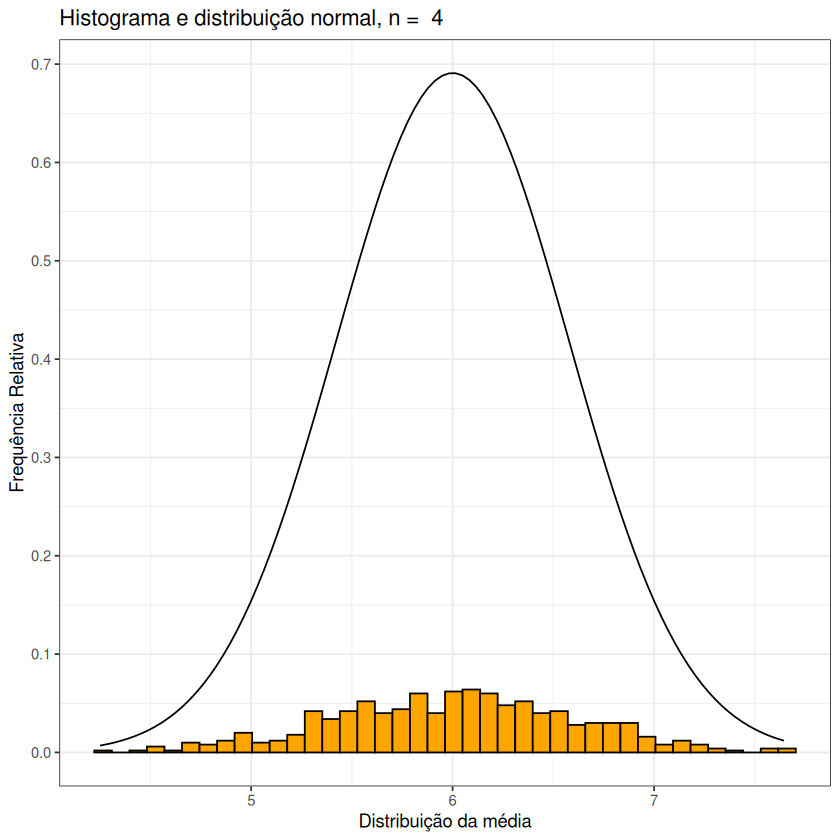

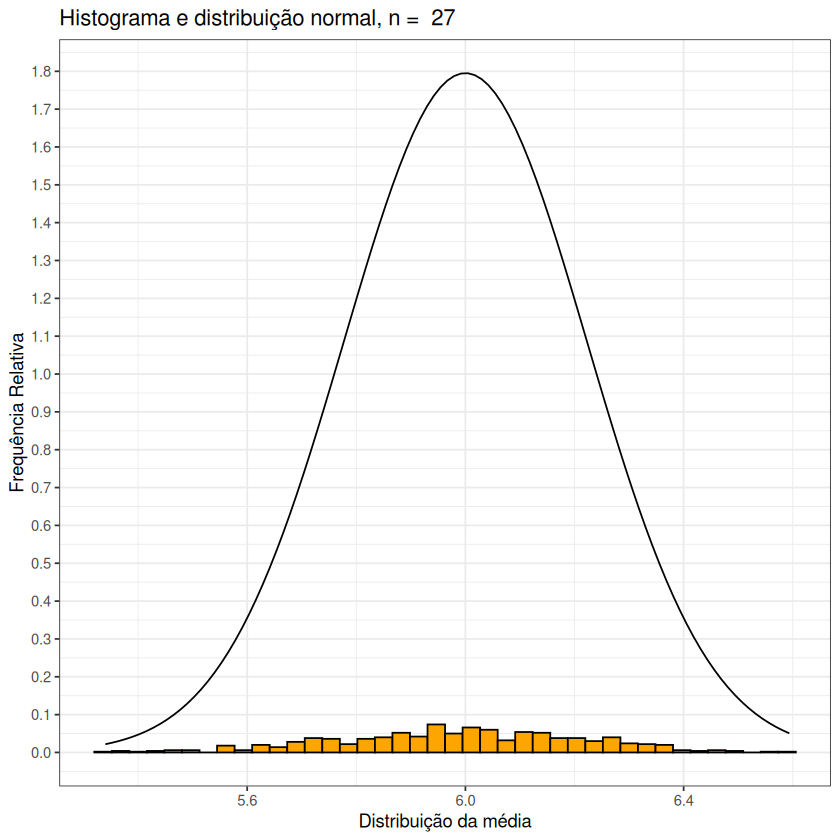

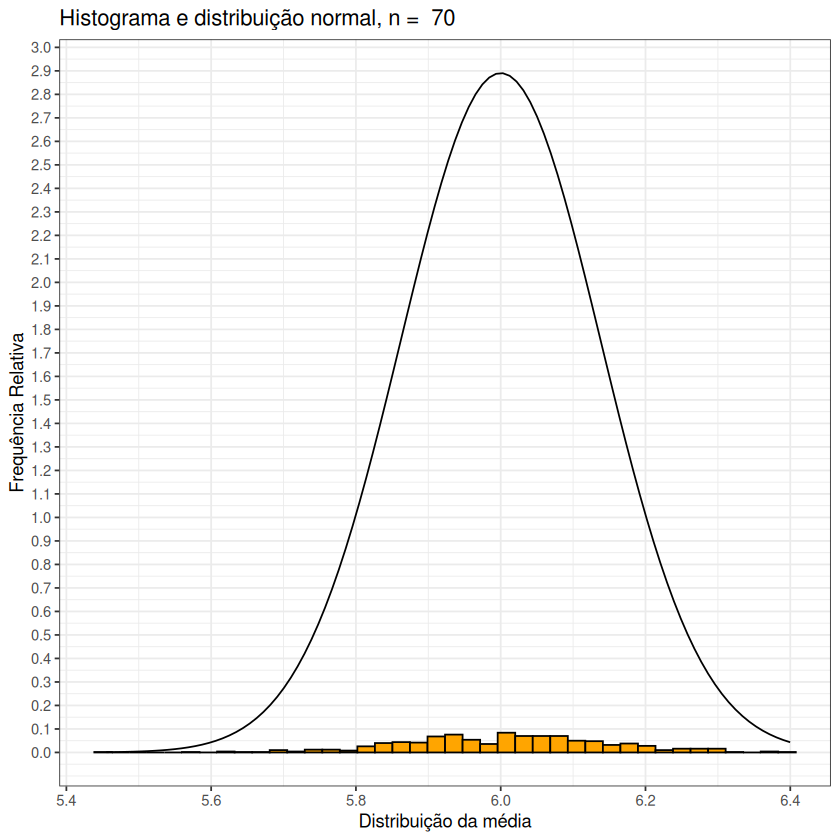

In [17]:
n_values <- c(4, 27, 70)
sample_amount <- 500
a <- 4
b <- 8
expected_value <- (b + a) / 2

calc_sd <- function(n) {
  return (sqrt(((b - a)**2) / (n * 12)))
}
calc_means <- function(n) {
  means <- c()
  for (i in 1:sample_amount) {
    means <- c(means, mean(runif(n, 4, 8)))
  }
  return (means)
}

for (n in n_values) {
  means <- calc_means(n)
  df <- data.frame(means)
  print(
    ggplot(df, aes(x = means)) +
    geom_histogram(aes(y=after_stat(count / sum(count))), color="black", fill="orange", bins=40) +
    stat_function(fun=dnorm, args=list(mean=expected_value, sd=calc_sd(n))) +
    theme_bw() +
    labs(x = "Distribuição da média", y = "Frequência Relativa") +
    ggtitle(paste("Histograma e distribuição normal, n = ", n)) +
    scale_y_continuous(breaks = seq(0, 5, .1))
  )
}